<center><h3> Painting EPIs of Church </h3></center>

In [6]:
# We will use library DataFrames to deal with DataFrames in csv
using DataFrames
using PyPlot

In [7]:
# Reading the table and images
points_x = readtable("./church_EPIs_x.csv")
points_y = readtable("./church_EPIs_y.csv");
# Import the first image
church_first = imread("./../EPI_samples/Church_data_set/church_image-raw/church_image_lowres/church_image-raw_0000_lowres.jpg")
church_last = imread("./../EPI_samples/Church_data_set/church_image-raw/church_image_lowres/church_image-raw_0100_lowres.jpg");

In [82]:
# Function that paints EPI
function paint_epi(points_x, points_y, ϵ, y0, s_rate=1)
    # Limits of the strip
    y01 = y0-ϵ;
    y02 = y0+ϵ;
    #Subset of features catched
    idy = (points_y[:y1].<=y02).*(points_y[:y1].>=y01);
    array_x = points_x[idy,:]
    array_y = points_y[idy,:];
    features = unique(array_x[:feature])
    for feature in unique(array_x[:feature])
        array_feature_x = array_x[array_x[:feature].==feature,:];
        array_feature_y = array_y[array_y[:feature].==feature,:];
        color_feature = array_x[array_x[:feature].==feature,:][:color][1]

        # find min and max of x coordinate for that feature
        xmax_feature_first,idxmax_feature = findmax(array_feature_x[:x1])
        xmin_feature_first, idxmin_feature = findmin(array_feature_x[:x1]);

        nonas = min(array_feature_x[idxmax_feature,:][:no_nas][1],array_feature_x[idxmin_feature,:][:no_nas][1]);

        i = 1
        cond_max = abs(array_feature_x[idxmax_feature,:][i+1]-array_feature_x[idxmax_feature,:][i+2])[1]<=10.0
        cond_min = abs(array_feature_x[idxmin_feature,:][i+1]-array_feature_x[idxmin_feature,:][i+2])[1]<=10.0
        
        while (i <= (nonas-4))*(cond_max)*(cond_min)
            x_max = [array_feature_x[idxmax_feature,:][i],array_feature_x[idxmax_feature,:][i+1]]
            x_min = [array_feature_x[idxmin_feature,:][i],array_feature_x[idxmin_feature,:][i+1]]
            plot(x_max,[i,i+1],color=color_feature)
            plot(x_min,[i,i+1],color=color_feature)
            x = [x_max[2][1],x_max[1][1],x_min[1][1],x_min[2][1]]
            y = [i+1,i,i,i+1];
            fill(x,y,color=color_feature)
            x_max = [array_feature_x[idxmax_feature,:][i],array_feature_x[idxmax_feature,:][i+1]]
            x_min = [array_feature_x[idxmin_feature,:][i],array_feature_x[idxmin_feature,:][i+1]]
            cond_max = abs(array_feature_x[idxmax_feature,:][i+1]-array_feature_x[idxmax_feature,:][i+2])[1]<=10.0
            cond_min = abs(array_feature_x[idxmin_feature,:][i+1]-array_feature_x[idxmin_feature,:][i+2])[1]<=10.0
            i+=s_rate
        end
    end
    plot([0,1024,1024,0,0],[0,0,maximum(array_x[:no_nas]),maximum(array_x[:no_nas]),0],color="black")
    ax = gca()
    ax[:set_frame_on](false) 
    ax[:set_frame_on](false)
    yticks([])
    xticks([])
    maximum(array_x[:no_nas])
end

paint_epi (generic function with 2 methods)

In [9]:
# Function that paints a strip in the first image with the
# captured points
function strip_epi(points_x, points_y, ϵ, y0)
    # Limits of the strip
    y01 = y0-ϵ;
    y02 = y0+ϵ;
    #Subset of features catched
    idy = (points_y[:y1].<=y02).*(points_y[:y1].>=y01);
    array_x = points_x[idy,:]
    array_y = points_y[idy,:];   
    plot([0,1024],[y01,y01],"-r")
    plot([0,1024],[y02,y02],"-r")
    i = 1
    imshow(church_first)
    x = array_x[i][~isna(array_x[i])]
    y = array_y[i][~isna(array_y[i])]
    colors = array_x[:color][~isna(array_x[i])]
    for j in 1:size(x)[1]
        plot(x[j],y[j], color=colors[j],"o")
    end
    ax = gca()
    ax[:set_frame_on](false) 
    ax[:set_frame_on](false)
    yticks([])
    xticks([])
end

strip_epi (generic function with 1 method)

In [10]:
feature = "bush1"
y0 = maximum(points_y[points_y[:feature].==feature,:][:y1])
ϵ = 6.0;

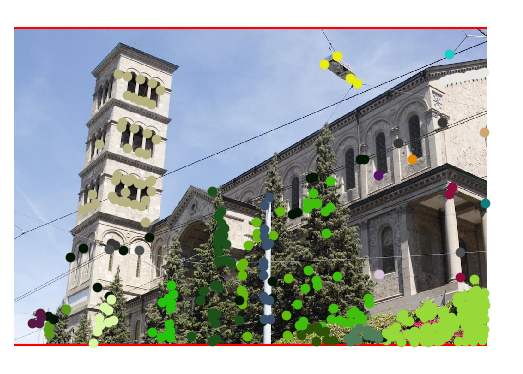

(Any[],Any[])

In [16]:
strip_epi(points_x, points_y,343, 342)

First we want to select the correct thickness for different heights. We do that with different criteria depending on the height. In the next we give a first try at the bottom to be able to set up some parameters and define in more detail the pipeline.

In [36]:
# Define the height and the epsilon for the strip 
y0=673
ϵ=10;

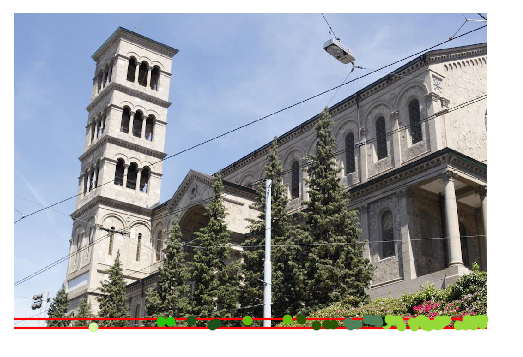

(Any[],Any[])

In [37]:
strip_epi(points_x, points_y,ϵ,y0)

In [109]:
# Limits of the strip
y01 = y0-ϵ;
y02 = y0+ϵ;
#Subset of features catched
idy = (points_y[:y1].<=y02).*(points_y[:y1].>=y01);
array_x = points_x[idy,:];
t_max = maximum(array_x[:no_nas])
no_features = size(unique(array_x[:feature]))[1]

"8"

In [110]:
println("In the strip "*"(y01,y02) we have "*string(size(array_x)[1])*" different tracked points correspondent to "*string(no_features)*" different features.\n"*
    "The maximum time registered was "*string(maximum(array_x[:no_nas]))*".")

In the strip (y01,y02) we have 48 different tracked points correspondent to 8 different features.
The maximum time registered was 102.


We will use all this information to tag each picture and use that information in the postprocessing. Lets see how it the paint of the correspondent EPI behaves with respect to the sample rate.

elapsed time: 0.422577575 seconds
elapsed time: 0.354827233 seconds
elapsed time: 0.397976356 seconds
elapsed time: 0.532823436 seconds
elapsed time: 0.553831838 seconds
elapsed time: 0.642391893 seconds
elapsed time: 0.564847426 seconds
elapsed time: 0.687816165 seconds
elapsed time: 0.841071834 seconds
elapsed time: 0.90781486 seconds
elapsed time: 1.36505855 seconds
elapsed time: 2.653928377 seconds
elapsed time: 1.846349939 seconds
elapsed time: 1.803380936 seconds
elapsed time: 3.559291163 seconds
elapsed time: 4.225782028 seconds
elapsed time: 5.154730225 seconds
elapsed time: 8.992805853 seconds
elapsed time: 15.584099311 seconds


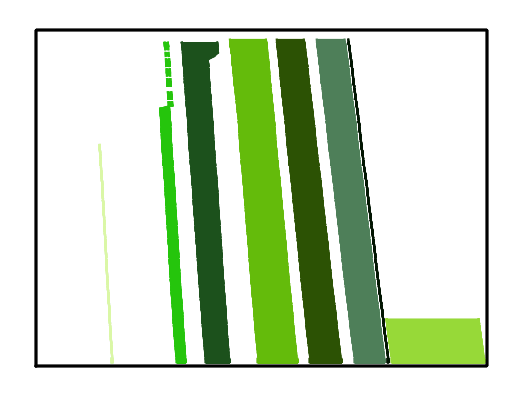

elapsed time: 37.305627863 seconds


In [102]:
i = 20
t = []
while i>=1
    tic()
    paint_epi(points_x, points_y, ϵ, y0,i)
    ti = toc()
    push!(t,ti)
    i = i-1
end;

In [101]:
t_max/10

10.2

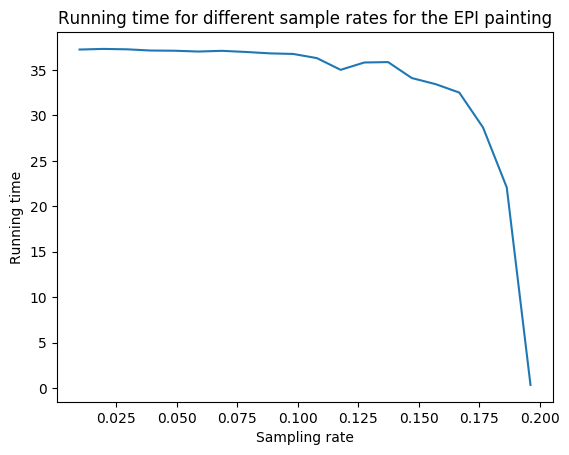

PyObject <matplotlib.text.Text object at 0x328e03210>

In [103]:
plot([i/t_max for i in 1:20], maximum(t)-t+minimum(t))
xlabel("Sampling rate")
ylabel("Running time")
title("Running time for different sample rates for the EPI painting")

One can observe a hockey stick around $0.16\approx 1/6$ of sampling rate where the running time start to decrease clearly. 

We can try first as in the paper of Light Field Reconstruction with Shearlets use a sample of each 4th row in the epi is known, that is the separation between sampled views will be 4 views.

In [ ]:
s_rate = 4;

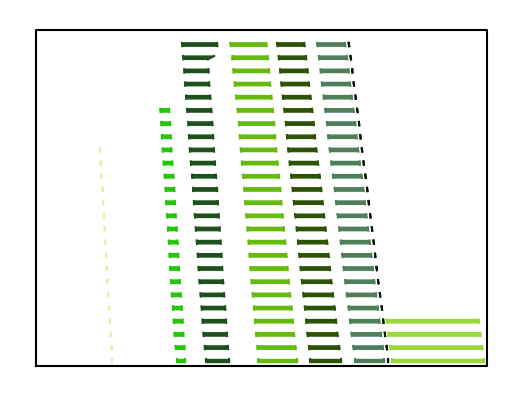

  2.773418 seconds (2.45 M allocations: 96.328 MB, 3.56% gc time)


102

In [106]:
@time paint_epi(points_x, points_y, ϵ, y0,4)

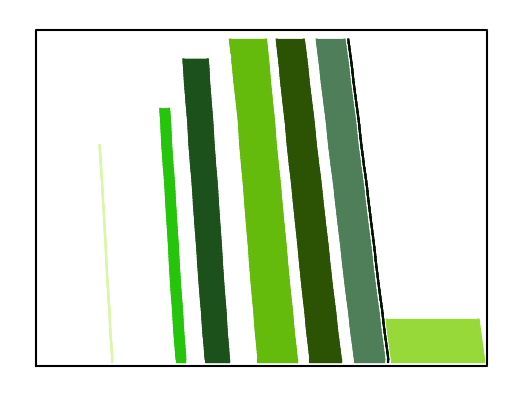

 11.139411 seconds (9.17 M allocations: 357.451 MB, 0.87% gc time)


102

In [108]:
@time paint_epi(points_x, points_y, ϵ, y0,1)

We can see that it is 5 time faster to sample every 4th view that to sample all the views. The format for naming  sparse EPIs will be named "y0\_$\epsilon$\_\tmax\_s_rate\_\#features\_sparse", the dense will be named "y0\_$\epsilon$\_\tmax\_s_rage\_\#features\_dense", and finally the strip with the picture as the background will be named "y0\_$\epsilon$\_\tmax\_s_rate\_\#features_strip".  

We will cut the pictures to just keep the important part and then resize them programatically to a size $1024
\times t_{max}$.

In [113]:
y0, ϵ,t_max, no_features

(673,10,102,"8")

In [1]:
683/2

341.5